Amal Krishna k

BL.EN.U4AIE21008

A1. Use HMM for classification of your speech signal using STFT features. 

In [2]:
!pip install hmmlearn

  Obtaining dependency information for hmmlearn from https://files.pythonhosted.org/packages/6b/62/0c7b618eac6f27220baecdfe476259e005c690bf825d02a3cb8e5470bf2c/hmmlearn-0.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   -------------------------------------- 125.4/125.4 kB 432.8 kB/s eta 0:00:00


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from hmmlearn import hmm
import librosa as lb
import librosa.display
import soundfile as sf
from IPython.display import Audio
from scipy.io.wavfile import write
from scipy.signal import stft,cosine,gaussian,convolve
import scipy.signal as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.signal import spectrogram
import os

In [20]:
# Function to extract STFT features from a speech signal
def stft_feature(signal, n_fft=2048, hop_length=512):
    stft = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))
    return stft

y, sr = librosa.load(r"E:\AI in Speech\Lab\audio.wav", sr=None)

In [26]:
# Function to generate and plot spectrogram of the recorded speech signal
def generate_spectrogram(signal, sr):
    f, t, Sxx = spectrogram(signal, sr)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Intensity (dB)')
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13556\2952455540.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')


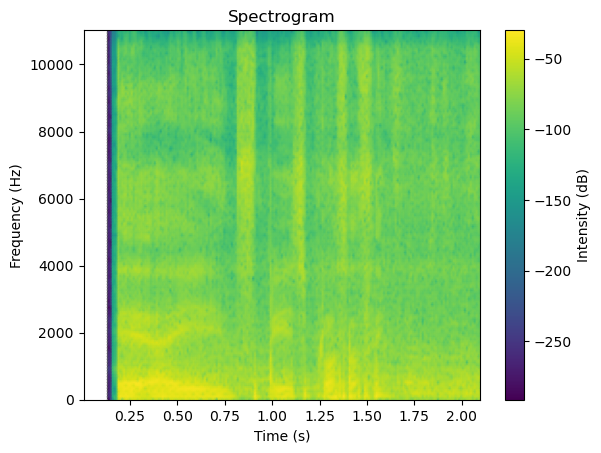

In [30]:
# Function to load the recorded speech signal
def load_audio(file_path):
    return librosa.load(file_path)

y, sr = load_audio(r"E:\AI in Speech\Lab\audio.wav")
# Extract STFT features from the recorded speech
stft_features = stft_feature(y)
generate_spectrogram(y,sr)

In [31]:
n_components = 3 
n_iter = 100  

# Train the HMM model
model = hmm.GaussianHMM(n_components=n_components, n_iter=n_iter)
model.fit(stft_features.T)

# Perform classification
predicted_labels = model.predict(stft_features.T)  
predicted_class = np.argmax(np.bincount(predicted_labels)) 

print("Predicted class:", predicted_class)

Predicted class: 2


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
# Performing the classification task
predicted_labels = model.predict(stft_features.T)

# Printing the state sequences
print("State Sequence is:")
print()
print(predicted_labels)

State Sequence is:

[2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 0
 0 0 0 2 2 2 0 2 2 2 2 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


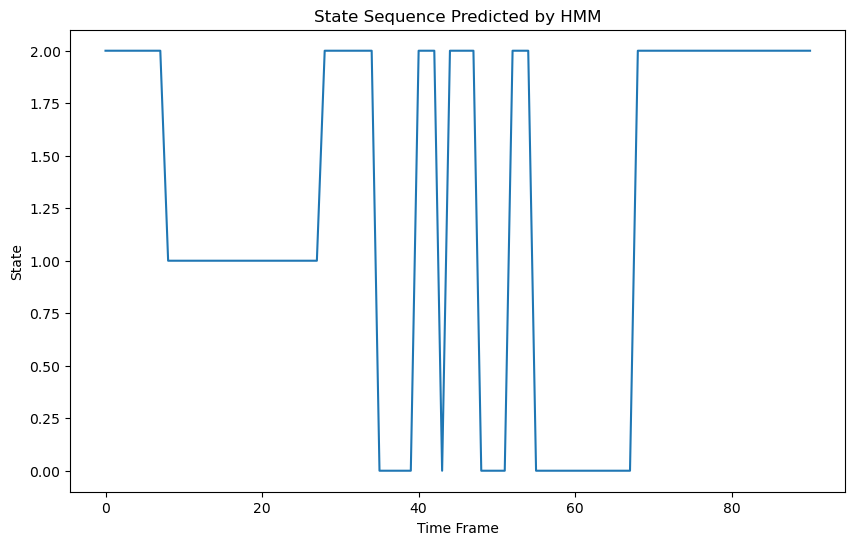

In [38]:
# Plotting the state sequence predicted by the HMM
plt.figure(figsize=(10,6))
plt.title('State Sequence Predicted by HMM')
plt.plot(predicted_labels)
plt.xlabel('Time Frame')
plt.ylabel('State')
plt.show()

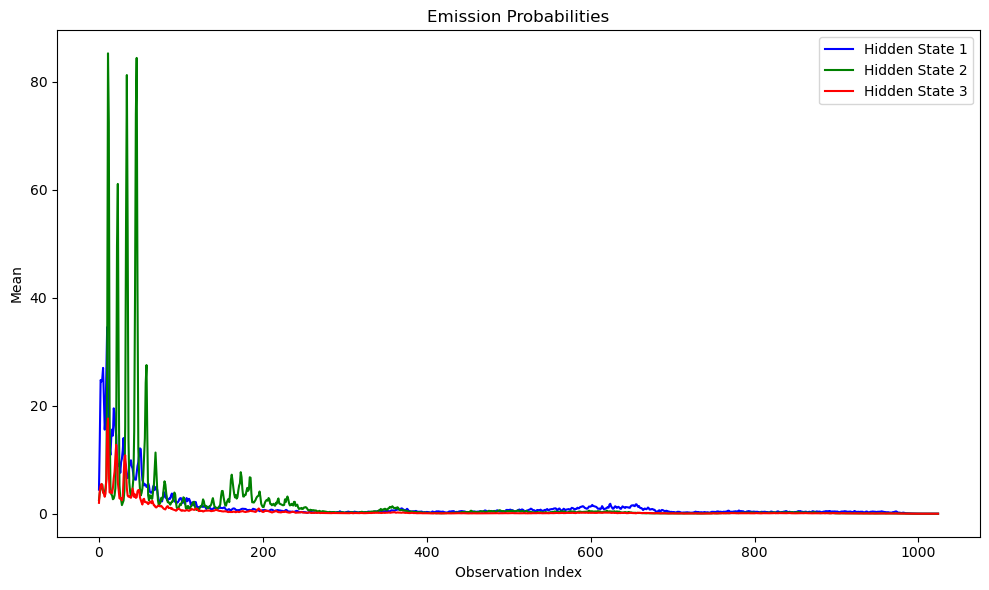

In [43]:
colors = ['blue', 'green', 'red'] 

# Plot the means of the Gaussian distributions (emission probabilities)
plt.figure(figsize=(10, 6))
plt.title('Emission Probabilities')
for i in range(model.n_components):
    plt.plot(model.means_[i], label=f'Hidden State {i+1}', color=colors[i])

plt.xlabel('Observation Index')
plt.ylabel('Mean')
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
# Function to prepare dataset for HMM
def prepare_dataset(spectrogram, window_size=10):
    # Slide a window over the spectrogram
    X = []
    for i in range(0, spectrogram.shape[1] - window_size):
        X.append(spectrogram[:, i:i+window_size].flatten())
    return np.array(X)

In [55]:
# Prepare dataset
X = prepare_dataset(stft_features)

# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Train HMM model
n_components = 3  # Number of states in HMM
model = hmm.GaussianHMM(n_components=n_components)
model.fit(X_train)

# Test the model
log_likelihood = model.score(X_test)
print("Log likelihood of the test set:", log_likelihood)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Log likelihood of the test set: -57446.51660884773
